We will use pandas and scikit-learn to load and explore the dataset. The dataset can easily be loaded from scikit-learn’s datasets module using read_csv function.

## Descriptive Analysis

Let's check the file: ../input/

It is an important first step for conducting statistical analysis. It gives an idea of the distribution of the data, helps us to detect outliers and typos, and identify associations among variables, thus preparing you for conducting further statistical analyses

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-score-prediction/CreditScore_train.csv
/kaggle/input/credit-score-prediction/CreditScore_test.csv


There is 1 csv file in the current version of the dataset:

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [2]:
#nRowsRead = 1000 # specify 'None' if want to read whole file
# innercity.csv has 21613 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/credit-score-prediction/CreditScore_train.csv') 
df2 = pd.read_csv('/kaggle/input/credit-score-prediction/CreditScore_test.csv') 
df1.dataframeName = 'CreditScore_train.csv'
df2.dataframeName = 'CreditScore_test.csv'
#df_concat.dataframeName='concat_df'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 80000 rows and 305 columns
There are 20000 rows and 305 columns


Let's take a quick look at what the data looks like:

In [3]:
df1["source"] = "train"
df2["source"] = "test"

df_concat = pd.concat([df1,df2])

We can easily convert the dataset into a pandas dataframe to perform exploratory data analysis. Simply pass in the dataset.data as an argument to pd.DataFrame(). We can view the first 5 rows in the dataset using head() function.

In [4]:
df_concat.shape

(100000, 306)

In [5]:
df_concat.head(5)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,...,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,...,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,...,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,...,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,...,1.0180,1,1,1,0,NaN,0,NaN,485,train


Find the dimension of given data


In [6]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Columns: 306 entries, x001 to source
dtypes: float64(41), int64(264), object(1)
memory usage: 234.2+ MB


In [7]:
df_concat.columns

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010',
       ...
       'x297', 'x298', 'x299', 'x300', 'x301', 'x302', 'x303', 'x304', 'y',
       'source'],
      dtype='object', length=306)

We can check the datatype of each column using dtypes to make sure every column has numeric datatype. If a column has different datatype such as string or character, we need to map that column to a numeric datatype such as integer or float. For this dataset, luckily there is no such column.

In [8]:
df_concat.dtypes

x001        int64
x002      float64
x003      float64
x004      float64
x005      float64
           ...   
x302      float64
x303        int64
x304      float64
y           int64
source     object
Length: 306, dtype: object

In [9]:
df_concat.isnull().any()

x001      False
x002       True
x003       True
x004       True
x005       True
          ...  
x302       True
x303      False
x304       True
y         False
source    False
Length: 306, dtype: bool

In [10]:
df_concat.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
          ...  
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int64

In [11]:
df_concat.duplicated().sum()

0

Now, we will understand the statistical summary of the dataset using the describe() function. Using this function, we can understand the count, min, max, mean and standard deviation for each attribute (column) in the dataset. 

Each of these can also be displayed individually using df.count(), df.min(), df.max(), df.median() and df.quantile(q).

In [12]:
df_concat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
x001,100000,NaN,NaN,NaN,1.21824e+06,272898,517,974364,1.23593e+06,1.44533e+06,1.6772e+06
x002,78568,NaN,NaN,NaN,125.712,115.785,0,32,100,180,718
x003,78568,NaN,NaN,NaN,25.5412,49.0288,0,3,8,24,704
x004,78576,NaN,NaN,NaN,65.3932,63.5923,0,19,48,92,704
x005,93890,NaN,NaN,NaN,178.239,124.521,0,87,150,246,827
x006,100000,NaN,NaN,NaN,0.31404,0.464135,0,0,0,1,1
x007,100000,NaN,NaN,NaN,0.694,1.37938,0,0,0,1,44
x008,100000,NaN,NaN,NaN,1.38822,2.2828,0,0,1,2,108
x009,100000,NaN,NaN,NaN,1.19298,2.03108,0,0,0,2,81
x010,100000,NaN,NaN,NaN,1.02699,1.71382,0,0,0,1,33


In [13]:
df_concat.count()

x001      100000
x002       78568
x003       78568
x004       78576
x005       93890
           ...  
x302       26931
x303      100000
x304       18125
y         100000
source    100000
Length: 306, dtype: int64

## Missing data
Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

Sometimes, in a dataset we will have missing values such as NaN or empty string in a cell. We need to take care of these missing values so that our machine learning model doesn’t break. To handle missing values, there are three approaches followed.

    Replace the missing value with a large negative number (e.g. -999).
    Replace the missing value with mean of the column.
    Replace the missing value with median of the column.

To find if a column in our dataset has missing values, you can use pd.isnull(df).any() which returns a boolean for each column in the dataset that tells if the column contains any missing value. In this dataset, there are no missing values!

In [14]:
#missing data
#total = df1.isnull().sum().sort_values(ascending=False)
#percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)

#missing data
total = df_concat.count()
sumcol=df_concat.isnull().sum()
countcol=df_concat.isnull().count()

percent = (df_concat.isnull().sum()/countcol*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,sumcol,countcol], axis=1, keys=['Total', 'Percent','Sumcol','countcol'])
#missing_data.head(20)
miss_perc=missing_data.sort_values(['Percent'], axis=0, ascending=False)
m_per = miss_perc[miss_perc.Percent > 60]
print(m_per)




      Total  Percent  Sumcol  countcol
x242   6661   93.339   93339    100000
x295  13467   86.533   86533    100000
x304  18125   81.875   81875    100000
x098  19319   80.681   80681    100000
x155  20949   79.051   79051    100000
x259  22568   77.432   77432    100000
x256  23087   76.913   76913    100000
x255  23087   76.913   76913    100000
x257  23087   76.913   76913    100000
x302  26931   73.069   73069    100000
x268  32747   67.253   67253    100000
x162  33519   66.481   66481    100000
x266  33539   66.461   66461    100000
x267  33539   66.461   66461    100000
x265  33539   66.461   66461    100000
x253  33667   66.333   66333    100000


In [15]:
drop_cols=m_per.index
print(drop_cols)
#[cols.append(i) for i in drop_cols if df[i].isnull().sum()/row*100 > 60 ]
#count=0
filt_concat_df=df_concat.drop(columns=drop_cols,axis=1)

#for i in drop_cols:
 #   print(i)
#    count=count+1
#filt_concat_df=df_concat.drop(columns=[i],axis=1)
print(filt_concat_df.shape)

Index(['x242', 'x295', 'x304', 'x098', 'x155', 'x259', 'x256', 'x255', 'x257',
       'x302', 'x268', 'x162', 'x266', 'x267', 'x265', 'x253'],
      dtype='object')
(100000, 290)


## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made.

In [16]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


## Correlation

Finding correlation between attributes is a highly useful way to check for patterns in the dataset. Pandas offers three different ways to find correlation between attributes (columns). The output of each of these correlation functions fall within the range [-1, 1].

    1 - Positively correlated
    -1 - Negatively correlated.
    0 - Not correlated.
    
We will use df.corr() function to compute the correlation between attributes


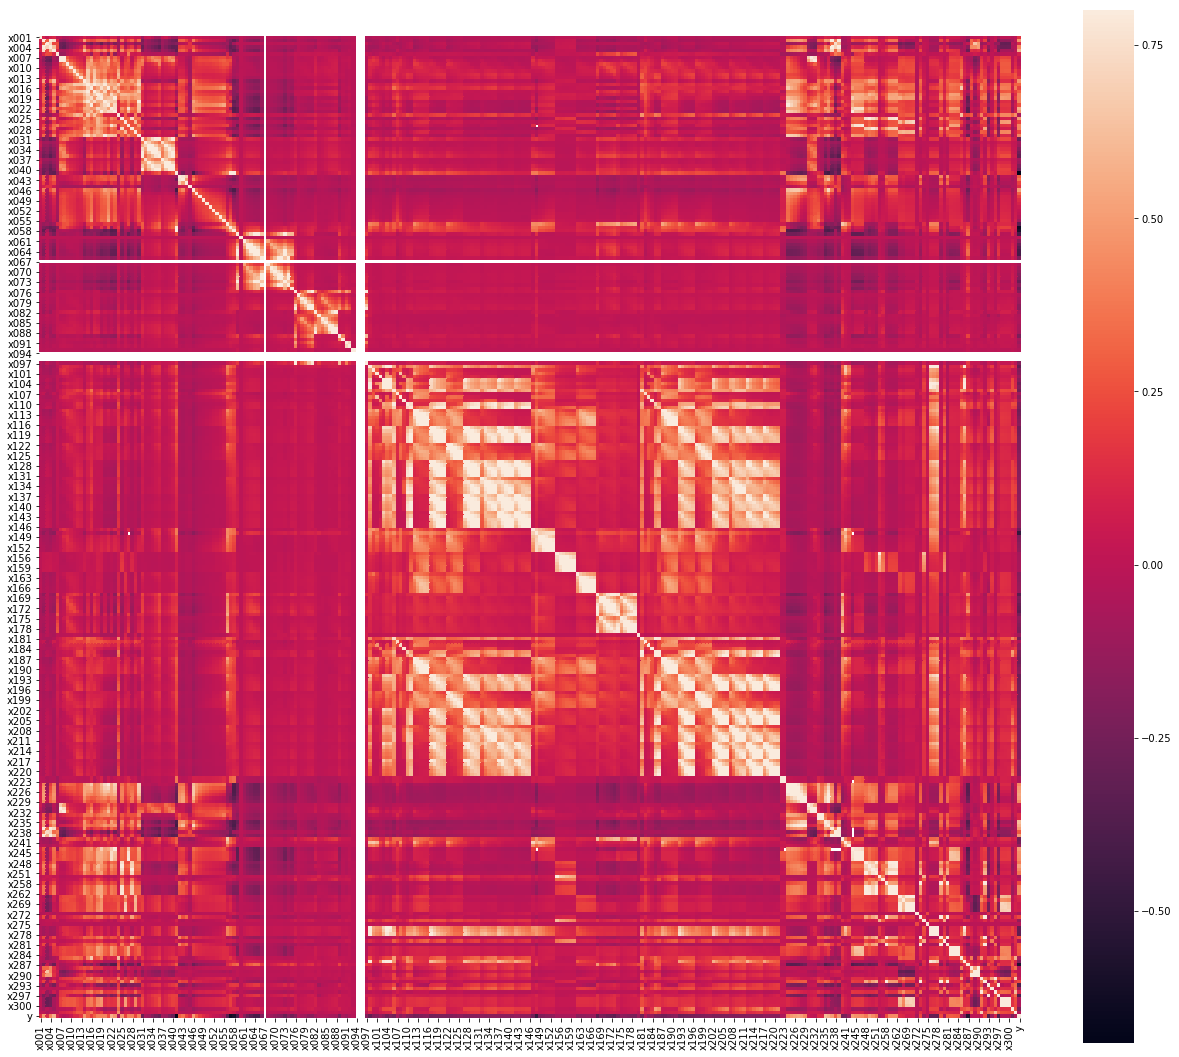

In [17]:
#filt_concat_df.corr("y")
corrmat=filt_concat_df.corr()
plt.figure(figsize=(22,19))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

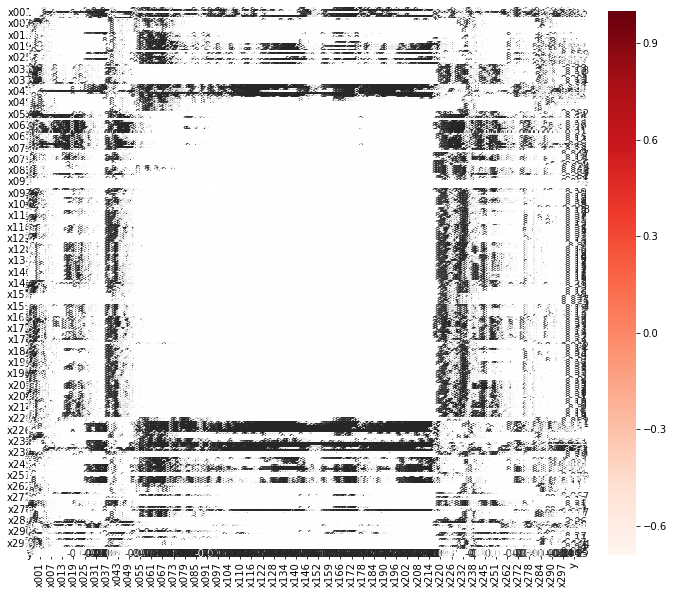

In [18]:
#corr=filt_concat_df.corr()['y'].abs()

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = filt_concat_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
#Correlation with output variable
cor_target = abs(filt_concat_df.corr()["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
          ...   
x298    0.044329
x299    0.044871
x300    0.040356
x301    0.224484
x303    0.035370
Name: y, Length: 225, dtype: float64

In [20]:
type(relevant_features)
relevant_features.item

<bound method IndexOpsMixin.item of x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
          ...   
x298    0.044329
x299    0.044871
x300    0.040356
x301    0.224484
x303    0.035370
Name: y, Length: 225, dtype: float64>

In [21]:
lst_key=[]
null_key=[]

In [22]:
filt_concat_df.shape

(100000, 290)

In [23]:
for i,j in relevant_features.items():
    lst_key.append(i)
#print(lst_key.count())
final_df=filt_concat_df.drop(columns=lst_key,axis=1)
print(final_df.shape)

(100000, 65)


In [24]:
a=final_df.isnull().any()==True

In [25]:
type(a)

pandas.core.series.Series

In [26]:

for i,j in a.items():
    if j==True:
        null_key.append(i)
print(null_key)
#final_df=filt_concat_df.drop(columns=lst_key,axis=1)f



['x002', 'x004', 'x005', 'x041', 'x057', 'x058', 'x148', 'x235', 'x237', 'x239', 'x287', 'x293', 'x297']


In [27]:
for i in null_key:
    final_df[i].fillna(final_df[i].mean(),inplace=True)
final_df.shape    

(100000, 65)

In [28]:
train_final = final_df[final_df.source=="train"]
test_final = final_df[final_df.source=="test"]
print(train_final.shape)
print(test_final.shape)
train_final.drop(columns="source",inplace=True)
test_final.drop(columns="source",inplace=True)

(80000, 65)
(20000, 65)


## Visualize the dataset

Now you're ready to read in the data and use the plotting functions to visualize the data.

We will use two types of visualization strategy namely univariate plots and bivariate plots. As the name suggests, univariate plot is used to visualize a single column or an attribute whereas bivariate plot is used to visualize two columns or two attributes.

## Box plot

A box-whisker plot is a univariate plot used to visualize a data distribution.

* * The ends of whiskers are the maximum and minimum range of data distribution.
* The central line in the box is the median of the entire data distribution.
* The right and left edges in the box are the medians of data distribution to the right and left from the central median, respectively.


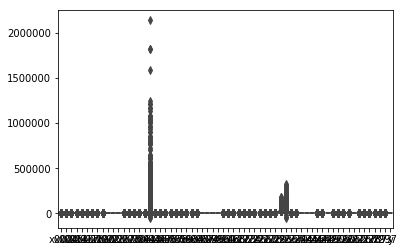

In [29]:
%matplotlib inline
sns.boxplot(data=train_final)

View the above Box plot clearly by adding figsize

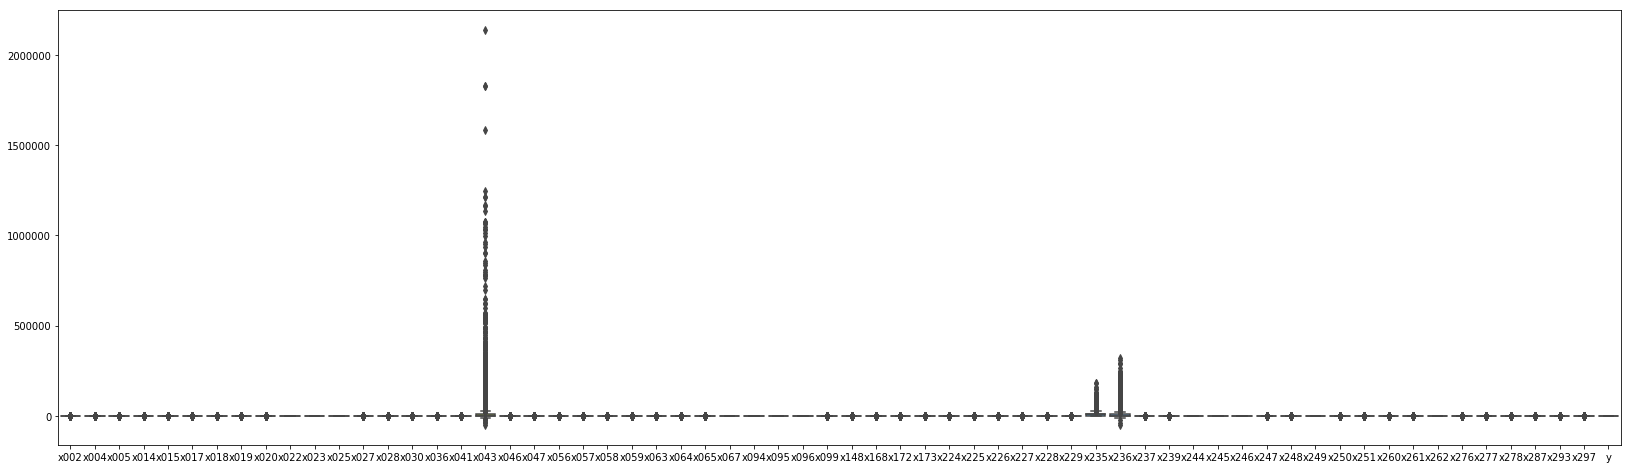

In [30]:
%matplotlib inline
plt.figure(figsize = (28,8))
sns.boxplot(data=train_final)

Distribution graphs (histogram/bar graph) of sampled columns:

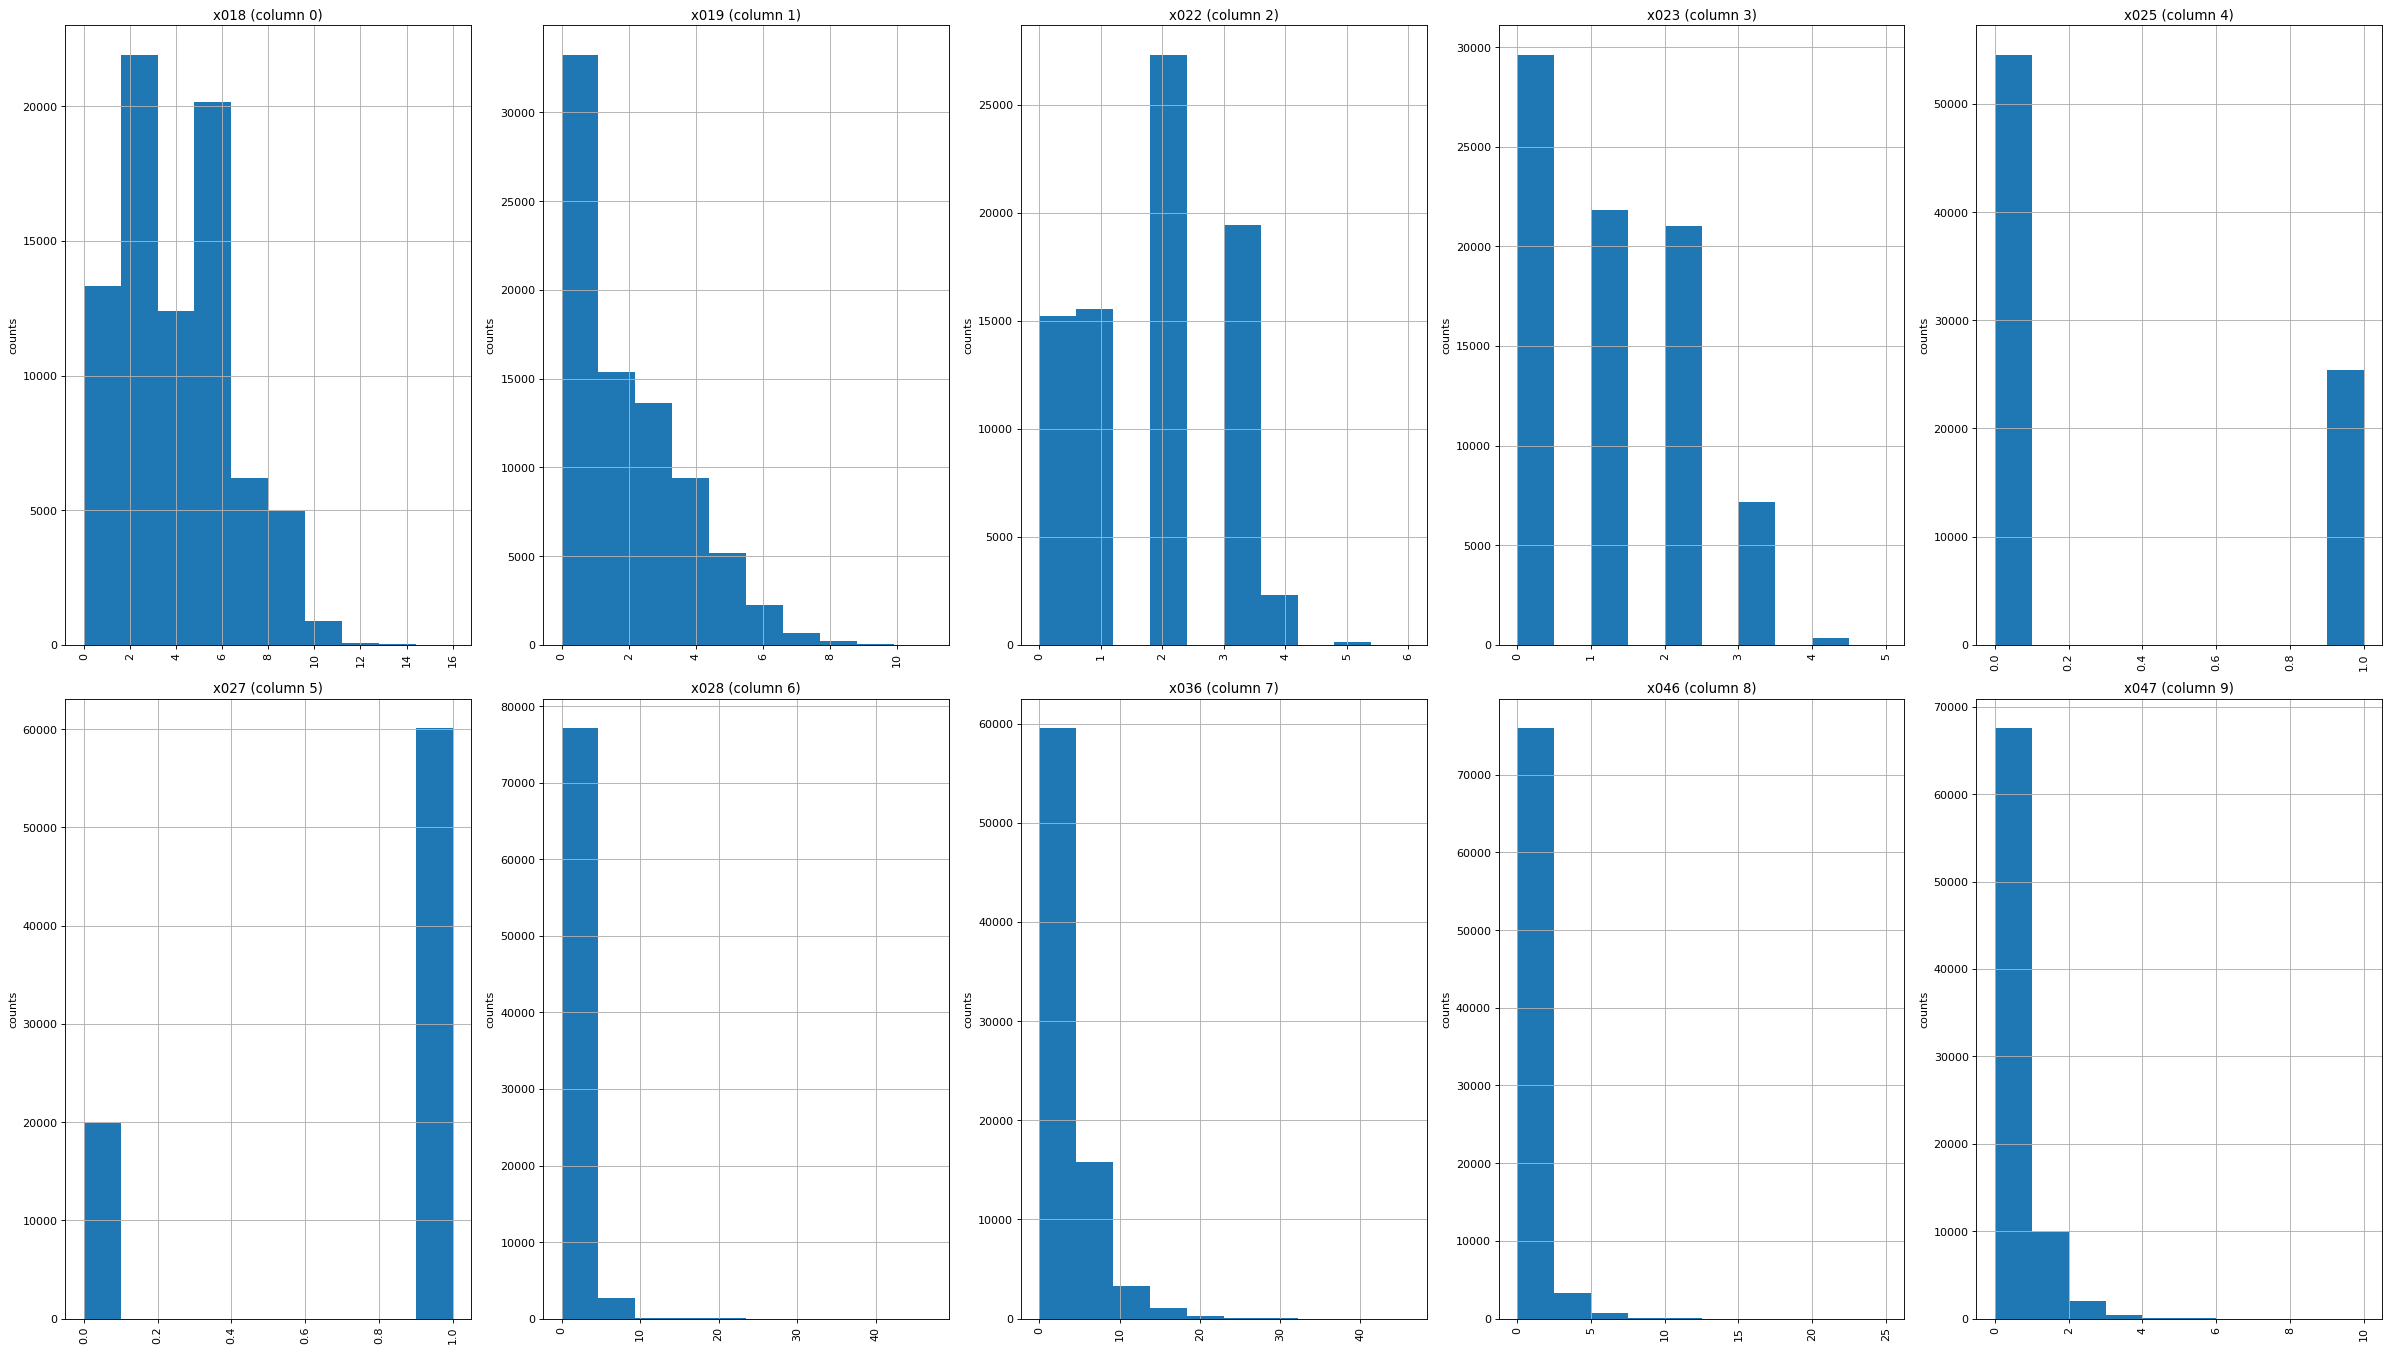

In [31]:
plotPerColumnDistribution(train_final, 10, 5)

## Density plot

Density plot is another univariate plot that draws a histogram of the data distribution and fits a Kernel Density Estimate (KDE).

A histogram is a graphical representation of a frequency distribution where data points are organized as bins, plotted with values along the x-axis and the count of data points in each bin along the y-axis.

## Scatter plot

Scatter plot is used to understand relationship between two different attributes in the dataset. Below we have compared PRICE (target) vs each of the attribute in the dataset.

In [32]:
print(pd.isnull(train_final).any())

x002    False
x004    False
x005    False
x014    False
x015    False
        ...  
x278    False
x287    False
x293    False
x297    False
y       False
Length: 64, dtype: bool


Wow, there is no null values in the given Dataset. 😜

## Training Regression Model

By looking at the dataset, we simply can’t suggest the best Regression Model for this problem. So, we will try out different Regression models available in scikit-learn with a k-fold cross validation method.

let's assume k = 10 (k-fold cross validation)

It means we split the training data into train and test data using a test_size parameter for 10-folds. Each fold will have different samples that are not present in other folds. By this way, we can throughly train our model on different samples in the dataset.

Before doing anything, we will split our dataframe df into features X and target Y.

In [33]:
train_final.head()

,x002,x004,x005,x014,x015,x017,x018,x019,x020,x022,...,x260,x261,x262,x276,x277,x278,x287,x293,x297,y
0,426.000000,128.000000,426.0,9,19,14,8,5,6,3,...,1,1,1,0,0,0,1.000000,0.812575,0.794034,807
1,160.000000,64.000000,160.0,5,21,16,5,3,9,3,...,1,1,1,0,0,0,1.000000,0.841700,0.841700,819
2,163.000000,104.000000,239.0,6,8,5,4,2,7,3,...,0,0,0,0,0,0,3.239309,0.812575,0.794034,803
3,125.711727,65.393212,102.0,0,4,4,2,0,0,0,...,0,0,0,0,0,0,9.000000,0.812575,0.794034,530
4,3.000000,2.000000,62.0,0,5,3,2,2,2,1,...,0,0,0,1,1,1,9.000000,1.018000,1.018000,485


In [34]:
X = train_final.drop("y", axis=1)
Y = train_final["y"]
print(X.shape)
print(Y.shape)

(80000, 63)
(80000,)


As we see different data distributions, we will standardize the dataset using StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

Now, we will split the data into train and test set. We can easily do this using scikit-learn’s train_test_split() function using a test_size parameter.

In [36]:
from sklearn.model_selection import train_test_split

seed      = 42
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(64000, 63)
(16000, 63)
(64000,)
(16000,)


Let’s dive into Regression. We will use different Regression models offered by scikit-learn to produce a baseline accuracy for this problem. 

We will use the MAE (Mean Absolute Error) as the performance metric for the regression models.

Linear: -39.966, 0.407
Lasso: -56.876, 0.532
Ridge: -40.016, 0.41
ElasticNet: -73.932, 0.537
DecisionTree: -34.932, 0.493
KNN: -38.358, 0.487
RandomForest: -25.926, 0.301
AdaBoost: -43.578, 0.361
GradientBoost: -27.902, 0.275
[17:22:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:22:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:23] W

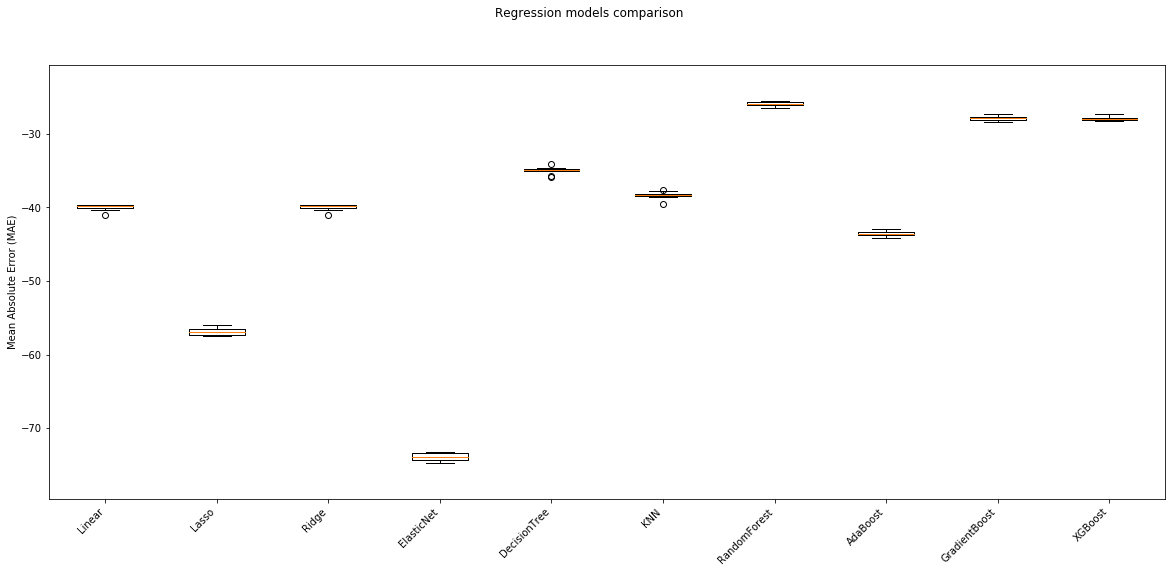

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# user variables to tune
folds   = 10
metric  = "neg_mean_absolute_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"] = XGBRegressor()

# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds, random_state=seed)
	results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure(figsize = (20,8))

figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.margins(0.05, 0.1)


## Choosing the best model

Based on the above comparison, we can see that RandamForest and  Gradient Boosting Regression model outperforms all the other regression models. So, we will choose it as the best Regression Model for this problem.

In [38]:
model = GradientBoostingRegressor()
model.fit(X_train,Y_train)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  4.691643158340477


In [39]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((Y_train - train_predict) / Y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )
Y_train, train_predict = np.array(Y_train), np.array(train_predict)

MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.803023937404005


In [40]:
model = RandomForestRegressor()
model.fit(X_test,Y_test)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

    
error_percent = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, test_predict = np.array(Y_test), np.array(test_predict)

#print("Mape - Train:" , np.mean(np.abs((Y_train,train_predict))))
#print("Mape - Test:" ,np.mean(np.abs((Y_test,test_predict))))


MAPE - Mean Absolute Percentage Error (TEST DATA):  1.9608743171356902


In [41]:
model = GradientBoostingRegressor()
model.fit(X_test,Y_test)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

    
error_percent = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
Y_test, test_predict = np.array(Y_test), np.array(test_predict)

#print("Mape - Train:" , np.mean(np.abs((Y_train,train_predict))))
#print("Mape - Test:" ,np.mean(np.abs((Y_test,test_predict))))


MAPE - Mean Absolute Percentage Error (TEST DATA):  4.57510209207396


We can visualize the predictions made by our best model and the original targets Y_test using the below code.

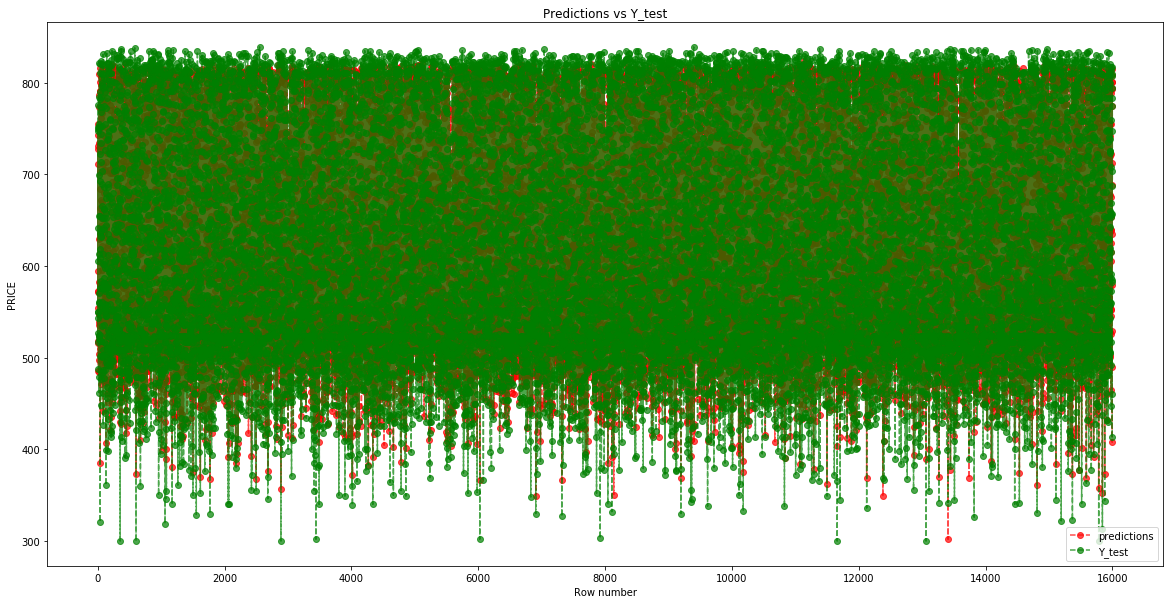

In [42]:
# plot between predictions and Y_test
x_axis = np.array(range(0, test_predict.shape[0]))
plt.figure(figsize=(20,10))
plt.plot(x_axis, test_predict, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')

We could still tune different regression models used in this example using scikit-learn’s GridSearchCV() function. By tuning, we mean trying out different hyper-parameters for each model.